In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston # 보스턴 주택값 데이터

In [2]:
boston = load_boston()

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [10]:
boston.feature_names   # 컬럼 이름

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [12]:
boston_df = pd.DataFrame(boston.data,columns = boston.feature_names)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


#### LinearRegression

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

#### train, test로 분리

In [17]:
X_train, X_test, y_train, y_test = train_test_split(boston_df, boston.target, test_size = 0.3)

In [22]:
linear_model = LinearRegression()

In [23]:
linear_model.fit(X_train, y_train)

LinearRegression()

In [27]:
linear_model.score(X_test, y_test)

0.7639756681303607

In [28]:
print(linear_model.coef_)  # 가중치

[-9.66654548e-02  4.61515935e-02 -2.83982810e-02  2.49844758e+00
 -1.56702655e+01  3.41758558e+00  5.54897136e-03 -1.50642410e+00
  2.86668422e-01 -1.00590133e-02 -9.66519690e-01  1.15613471e-02
 -6.04587024e-01]


In [30]:
print(linear_model.intercept_)  # 절편

37.89704998876045


#### 교차검증

In [33]:
result = cross_val_score(linear_model,   # 모델, 문제, 답, cv 수
                         X_train, y_train,
                        cv = 5)
result

array([0.52990841, 0.65575568, 0.74164787, 0.66208676, 0.73638131])

In [35]:
result.mean()

0.6651560072367755

#### 특성확장

In [36]:
e_X_train = X_train.copy()

In [37]:
for i in X_train.columns:
    for j in X_train.columns:
        e_X_train[i+'x'+j] = X_train[i] * X_train[j]

In [38]:
e_X_train.shape

(354, 182)

In [39]:
linear_model2 = LinearRegression()
linear_model2.fit(e_X_train, y_train)

LinearRegression()

In [40]:
result = cross_val_score(linear_model2,   # 모델, 문제, 답, cv 수
                         e_X_train, y_train,
                        cv = 5)
result

array([0.76220002, 0.77910051, 0.88012452, 0.84846509, 0.81962174])

In [41]:
result.mean()

0.8179023758301176

In [43]:
e_X_test = X_test.copy()

In [44]:
for i in X_test.columns:
    for j in X_test.columns:
        e_X_test[i+'x'+j] = X_test[i] * X_test[j]

In [45]:
linear_model2.score(e_X_test, y_test)

0.8195989469910526

### Ridge

In [46]:
from sklearn.linear_model import Ridge

In [47]:
ridge_model = Ridge()

In [49]:
ridge_model.fit(e_X_train, y_train)

Ridge()

In [51]:
ridge_model.score(e_X_test, y_test)

0.8149892477389281

### Lasso

In [52]:
from sklearn.linear_model import Lasso

#### Ridge Lasso 비교

In [54]:
rd_list = [0.001, 0.01, 0.1, 10, 100, 1000]
r_coef_list = []
l_coef_list = []

for i in rd_list:
    r_model = Ridge(alpha = i)  # 모델생성
    l_model = Lasso(alpha = i)
    
    r_model.fit(e_X_train, y_train)   # 학습
    l_model.fit(e_X_train, y_train)
    
    r_coef_list.append(r_model.coef_)  # 가중치
    l_coef_list.append(l_model.coef_)

C:\Users\smhrd\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.64179e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\smhrd\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1153.5700033016262, tolerance: 3.130790440677966
  model = cd_fast.enet_coordinate_descent(
C:\Users\smhrd\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1282.9415262790715, tolerance: 3.130790440677966
  model = cd_fast.enet_coordinate_descent(
C:\Users\smhrd\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Du

In [57]:
def plot(coef, alpha):
    plt.figure(figsize = (6,3)) # 그래프 크기
    plt.ylim([-13, 5]) # y축 범위
    plt.bar(e_X_train.columns,coef) # 막대그래프, 를 기준으로 왼쪽에는 x축 컬럼데이터, 오른쪽에는 y축 데이터
    plt.xticks(rotation = 45)  # 컬럼 이름이 겹쳐서 나오는걸 방지
    plt.title('alpha = {}'.format(alpha))
    plt.show() # 그래프보기

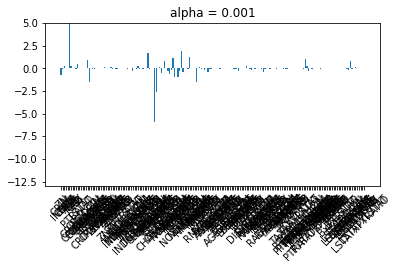

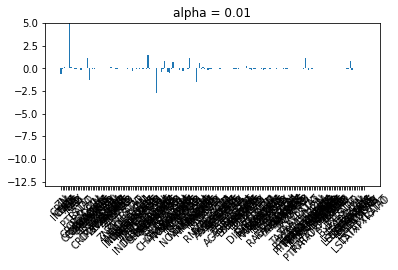

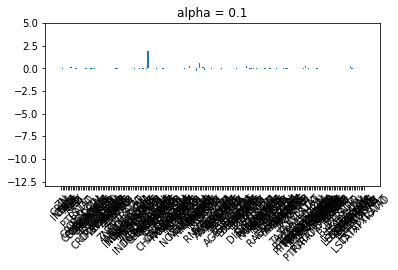

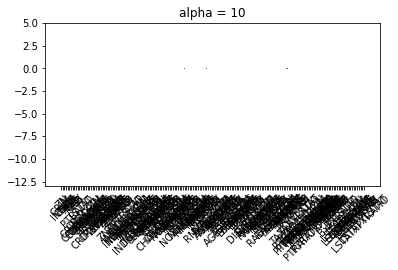

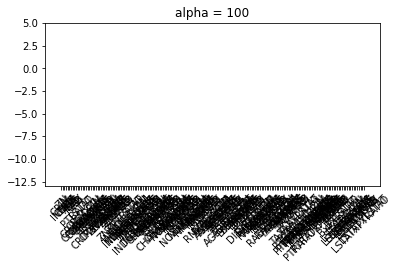

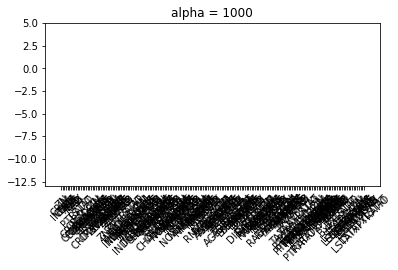

In [59]:
cnt = 0
for i in rd_list:
    plot(l_coef_list[cnt], i) # Lasso
    cnt += 1